In [1]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from PIL import Image
from io import BytesIO
from pandas.io.json import json_normalize
import numpy as np

In [2]:
response=requests.get('https://restcountries.eu/rest/v2/all')

In [3]:
status=response.status_code
status

200

In [4]:
d=response.json()

In [5]:
df=json_normalize(d)
df.shape[0]

250

In [6]:
df.rename(columns={'name':'country','alpha3Code':'alphaCode'},inplace=True)
df.drop(['topLevelDomain','alpha2Code','altSpellings','callingCodes','numericCode','translations.de', 'translations.es',
       'translations.fr', 'translations.ja', 'translations.it',
       'translations.br', 'translations.pt', 'translations.nl',
       'translations.hr', 'translations.fa'],axis=1,inplace=True)

In [7]:
df.head()

,country,alphaCode,capital,region,subregion,population,latlng,demonym,area,gini,timezones,borders,nativeName,currencies,languages,flag,regionalBlocs,cioc
0,Afghanistan,AFG,Kabul,Asia,Southern Asia,27657145,"[33.0, 65.0]",Afghan,652230.0,27.8,[UTC+04:30],"[IRN, PAK, TKM, UZB, TJK, CHN]",افغانستان,"[{'code': 'AFN', 'name': 'Afghan afghani', 'sy...","[{'iso639_1': 'ps', 'iso639_2': 'pus', 'name':...",https://restcountries.eu/data/afg.svg,"[{'acronym': 'SAARC', 'name': 'South Asian Ass...",AFG
1,Åland Islands,ALA,Mariehamn,Europe,Northern Europe,28875,"[60.116667, 19.9]",Ålandish,1580.0,NaN,[UTC+02:00],[],Åland,"[{'code': 'EUR', 'name': 'Euro', 'symbol': '€'}]","[{'iso639_1': 'sv', 'iso639_2': 'swe', 'name':...",https://restcountries.eu/data/ala.svg,"[{'acronym': 'EU', 'name': 'European Union', '...",
2,Albania,ALB,Tirana,Europe,Southern Europe,2886026,"[41.0, 20.0]",Albanian,28748.0,34.5,[UTC+01:00],"[MNE, GRC, MKD, KOS]",Shqipëria,"[{'code': 'ALL', 'name': 'Albanian lek', 'symb...","[{'iso639_1': 'sq', 'iso639_2': 'sqi', 'name':...",https://restcountries.eu/data/alb.svg,"[{'acronym': 'CEFTA', 'name': 'Central Europea...",ALB
3,Algeria,DZA,Algiers,Africa,Northern Africa,40400000,"[28.0, 3.0]",Algerian,2381741.0,35.3,[UTC+01:00],"[TUN, LBY, NER, ESH, MRT, MLI, MAR]",الجزائر,"[{'code': 'DZD', 'name': 'Algerian dinar', 'sy...","[{'iso639_1': 'ar', 'iso639_2': 'ara', 'name':...",https://restcountries.eu/data/dza.svg,"[{'acronym': 'AU', 'name': 'African Union', 'o...",ALG
4,American Samoa,ASM,Pago Pago,Oceania,Polynesia,57100,"[-14.33333333, -170.0]",American Samoan,199.0,NaN,[UTC-11:00],[],American Samoa,"[{'code': 'USD', 'name': 'United State Dollar'...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...",https://restcountries.eu/data/asm.svg,[],ASA


In [8]:
df.columns

Index(['country', 'alphaCode', 'capital', 'region', 'subregion', 'population',
       'latlng', 'demonym', 'area', 'gini', 'timezones', 'borders',
       'nativeName', 'currencies', 'languages', 'flag', 'regionalBlocs',
       'cioc'],
      dtype='object')

In [9]:
#Change area and gini into float type
df['area']=df['area'].astype(float)
df['gini']=df['gini'].astype(float)

In [10]:
df.dtypes

country           object
alphaCode         object
capital           object
region            object
subregion         object
population         int64
latlng            object
demonym           object
area             float64
gini             float64
timezones         object
borders           object
nativeName        object
currencies        object
languages         object
flag              object
regionalBlocs     object
cioc              object
dtype: object

In [11]:
#Function to extract and unlist languages column
lang=[]
for i in range(0,250):
    tab=pd.Series(df['languages'][i])
    tab=json_normalize(tab)
    name=tab['name'].tolist()
    name=','.join(name)
    lang.append(name)

df['languages']=lang

In [12]:
#Function to extract and unlist currencies column
curr=[]
for i in range(0,250):
    tab=pd.Series(df['currencies'][i])
    tab=json_normalize(tab)
    name=tab['name'].to_string()
    name=''.join(name)
    name=name.replace('0','').replace('\n1',',')
    curr.append(name)
    
df['currencies']=curr

In [13]:
#Function to extract and unlist regionalBlocs column
#Containing [] list of values
bloc=[]   
for i in range(0,250):
    if len(df['regionalBlocs'][i]) > 0:
        tab=pd.Series(df['regionalBlocs'][i])
        tab=json_normalize(tab)
        name=tab['name'].tolist()
        name=''.join(name)
        bloc.append(name)
    else:
        bloc.append('None')


df['regionalBlocs']=bloc

In [14]:
#Unlist borders column and fill empty value with None string
border=[]
for i in range(250):
    if len(df['borders'][i]) > 0:
        a=df['borders'][i]
        a=','.join(a)
        border.append(a)
    else:
        border.append('None')
df['borders']=border

In [15]:
#Unlist timezones column
time=[]
for i in range(0,250):
    a=df['timezones'][i]
    a=','.join(a)
    time.append(a)
df['timezones']=time

In [16]:
#Create lat and lon columns:
lat=[]
lon=[]
for i in range(250):
    if len(df['latlng'][i]) > 0:
        la=df['latlng'][i][0]
        lo=df['latlng'][i][1]
        lat.append(la)
        lon.append(lo)
    else:
        lat.append(np.nan)
        lon.append(np.nan)
df['lat']=lat
df['lon']=lon

In [17]:
df.drop('latlng',axis=1,inplace=True)

In [18]:
#There are 3 values presented as Nan in cioc column
#Besides there are some columns shown with empty values not NaN
df['cioc'].fillna('Unknown',inplace=True)

In [19]:
#There are some columns with empty string values which are not shown as NaN
#Fill all those with Unknown string
def fill_empty(col):
    new=[]
    for i in col:
        if i == '':
            new.append('Unknown')
        else:
            new.append(i)
    return new

df['subregion']=fill_empty(df['subregion'])
df['region']=fill_empty(df['region'])
df['demonym']=fill_empty(df['demonym'])
df['cioc']=fill_empty(df['cioc'])
df['capital']=fill_empty(df['capital'])

In [20]:
df['popDensity']=round(df['population']/df['area'],2)
df.head()

,country,alphaCode,capital,region,subregion,population,demonym,area,gini,timezones,borders,nativeName,currencies,languages,flag,regionalBlocs,cioc,lat,lon,popDensity
0,Afghanistan,AFG,Kabul,Asia,Southern Asia,27657145,Afghan,652230.0,27.8,UTC+04:30,"IRN,PAK,TKM,UZB,TJK,CHN",افغانستان,Afghan afghani,"Pashto,Uzbek,Turkmen",https://restcountries.eu/data/afg.svg,South Asian Association for Regional Cooperation,AFG,33.000000,65.0,42.40
1,Åland Islands,ALA,Mariehamn,Europe,Northern Europe,28875,Ålandish,1580.0,NaN,UTC+02:00,None,Åland,Euro,Swedish,https://restcountries.eu/data/ala.svg,European Union,Unknown,60.116667,19.9,18.28
2,Albania,ALB,Tirana,Europe,Southern Europe,2886026,Albanian,28748.0,34.5,UTC+01:00,"MNE,GRC,MKD,KOS",Shqipëria,Albanian lek,Albanian,https://restcountries.eu/data/alb.svg,Central European Free Trade Agreement,ALB,41.000000,20.0,100.39
3,Algeria,DZA,Algiers,Africa,Northern Africa,40400000,Algerian,2381741.0,35.3,UTC+01:00,"TUN,LBY,NER,ESH,MRT,MLI,MAR",الجزائر,Algerian dinar,Arabic,https://restcountries.eu/data/dza.svg,African UnionArab League,ALG,28.000000,3.0,16.96
4,American Samoa,ASM,Pago Pago,Oceania,Polynesia,57100,American Samoan,199.0,NaN,UTC-11:00,None,American Samoa,United State Dollar,"English,Samoan",https://restcountries.eu/data/asm.svg,None,ASA,-14.333333,-170.0,286.93


In [21]:
#Keep NaN values in area, gini, lat, lon and popDensity columns due to no related information to fill in  
df.isnull().sum()

country           0
alphaCode         0
capital           0
region            0
subregion         0
population        0
demonym           0
area             10
gini             97
timezones         0
borders           0
nativeName        0
currencies        0
languages         0
flag              0
regionalBlocs     0
cioc              0
lat               1
lon               1
popDensity       10
dtype: int64

In [22]:
dff=df.copy()

In [23]:
#Check each region has how many countries
dff['region'].value_counts()

Africa      60
Americas    57
Europe      53
Asia        50
Oceania     27
Unknown      2
Polar        1
Name: region, dtype: int64

### Analyzing asia countries

In [30]:
asia=dff[dff['region']=='Asia'].reset_index(drop=True)
asia.head()

,country,alphaCode,capital,region,subregion,population,demonym,area,gini,timezones,borders,nativeName,currencies,languages,flag,regionalBlocs,cioc,lat,lon,popDensity
0,Afghanistan,AFG,Kabul,Asia,Southern Asia,27657145,Afghan,652230.0,27.8,UTC+04:30,"IRN,PAK,TKM,UZB,TJK,CHN",افغانستان,Afghan afghani,"Pashto,Uzbek,Turkmen",https://restcountries.eu/data/afg.svg,South Asian Association for Regional Cooperation,AFG,33.0,65.00,42.40
1,Armenia,ARM,Yerevan,Asia,Western Asia,2994400,Armenian,29743.0,30.9,UTC+04:00,"AZE,GEO,IRN,TUR",Հայաստան,Armenian dram,"Armenian,Russian",https://restcountries.eu/data/arm.svg,Eurasian Economic Union,ARM,40.0,45.00,100.68
2,Azerbaijan,AZE,Baku,Asia,Western Asia,9730500,Azerbaijani,86600.0,33.7,UTC+04:00,"ARM,GEO,IRN,RUS,TUR",Azərbaycan,Azerbaijani manat,Azerbaijani,https://restcountries.eu/data/aze.svg,None,AZE,40.5,47.50,112.36
3,Bahrain,BHR,Manama,Asia,Western Asia,1404900,Bahraini,765.0,NaN,UTC+03:00,None,‏البحرين,Bahraini dinar,Arabic,https://restcountries.eu/data/bhr.svg,Arab League,BRN,26.0,50.55,1836.47
4,Bangladesh,BGD,Dhaka,Asia,Southern Asia,161006790,Bangladeshi,147570.0,32.1,UTC+06:00,"MMR,IND",Bangladesh,Bangladeshi taka,Bengali,https://restcountries.eu/data/bgd.svg,South Asian Association for Regional Cooperation,BAN,24.0,90.00,1091.05


In [25]:
asia['subregion'].value_counts()

Western Asia          17
South-Eastern Asia    11
Southern Asia          9
Eastern Asia           8
Central Asia           5
Name: subregion, dtype: int64

In [26]:
total_population=asia.groupby('subregion')['population'].sum().sort_values(ascending=False)
total_population

subregion
Southern Asia         1807886040
Eastern Asia          1615034420
South-Eastern Asia     632070274
Western Asia           262541930
Central Asia            68722120
Name: population, dtype: int64

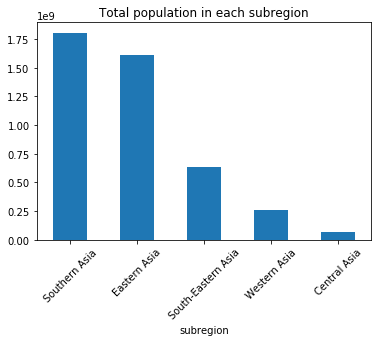

In [43]:
total_population.plot.bar(rot=45,title='Total population in each subregion')

In [31]:
sea=asia[asia['subregion']=='South-Eastern Asia'].reset_index(drop=True)
sea.head()

,country,alphaCode,capital,region,subregion,population,demonym,area,gini,timezones,borders,nativeName,currencies,languages,flag,regionalBlocs,cioc,lat,lon,popDensity
0,Brunei Darussalam,BRN,Bandar Seri Begawan,Asia,South-Eastern Asia,411900,Bruneian,5765.0,NaN,UTC+08:00,MYS,Negara Brunei Darussalam,"Brunei dollar, Singapore dollar",Malay,https://restcountries.eu/data/brn.svg,Association of Southeast Asian Nations,BRU,4.5,114.666667,71.45
1,Cambodia,KHM,Phnom Penh,Asia,South-Eastern Asia,15626444,Cambodian,181035.0,37.9,UTC+07:00,"LAO,THA,VNM",Kâmpŭchéa,"Cambodian riel, United States dollar",Khmer,https://restcountries.eu/data/khm.svg,Association of Southeast Asian Nations,CAM,13.0,105.000000,86.32
2,Indonesia,IDN,Jakarta,Asia,South-Eastern Asia,258705000,Indonesian,1904569.0,34.0,"UTC+07:00,UTC+08:00,UTC+09:00","TLS,MYS,PNG",Indonesia,Indonesian rupiah,Indonesian,https://restcountries.eu/data/idn.svg,Association of Southeast Asian Nations,INA,-5.0,120.000000,135.83
3,Lao People's Democratic Republic,LAO,Vientiane,Asia,South-Eastern Asia,6492400,Laotian,236800.0,36.7,UTC+07:00,"MMR,KHM,CHN,THA,VNM",ສປປລາວ,Lao kip,Lao,https://restcountries.eu/data/lao.svg,Association of Southeast Asian Nations,LAO,18.0,105.000000,27.42
4,Malaysia,MYS,Kuala Lumpur,Asia,South-Eastern Asia,31405416,Malaysian,330803.0,46.2,UTC+08:00,"BRN,IDN,THA",Malaysia,Malaysian ringgit,Malaysian,https://restcountries.eu/data/mys.svg,Association of Southeast Asian Nations,MAS,2.5,112.500000,94.94


In [28]:
#The most populous country in South-Eastern Asia
sea[sea['population']==sea['population'].max()]

,country,alphaCode,capital,region,subregion,population,demonym,area,gini,timezones,borders,nativeName,currencies,languages,flag,regionalBlocs,cioc,lat,lon,popDensity
2,Indonesia,IDN,Jakarta,Asia,South-Eastern Asia,258705000,Indonesian,1904569.0,34.0,"UTC+07:00,UTC+08:00,UTC+09:00","TLS,MYS,PNG",Indonesia,Indonesian rupiah,Indonesian,https://restcountries.eu/data/idn.svg,Association of Southeast Asian Nations,INA,-5.0,120.0,135.83


In [29]:
#The least populous country
sea[sea['population']==sea['population'].min()]

,country,alphaCode,capital,region,subregion,population,demonym,area,gini,timezones,borders,nativeName,currencies,languages,flag,regionalBlocs,cioc,lat,lon,popDensity
0,Brunei Darussalam,BRN,Bandar Seri Begawan,Asia,South-Eastern Asia,411900,Bruneian,5765.0,NaN,UTC+08:00,MYS,Negara Brunei Darussalam,"Brunei dollar, Singapore dollar",Malay,https://restcountries.eu/data/brn.svg,Association of Southeast Asian Nations,BRU,4.5,114.666667,71.45
